# Bird's eye view of Qiskit Metal

## 🌟 The Qiskit Metal Design Flow — Your 4-Step Adventure 🌟

Welcome! In this short tutorial, you’ll take your very first steps in Qiskit Metal.  
Think of it as designing a quantum chip with LEGO blocks… just the superconducting kind. 🧩⚡️

Let’s walk through the four stages you’ll use again and again:


### **1. Pick a Design Class 🏗️**
Start by choosing the type of *design container* you want to work with.  
This acts as your blank canvas for building quantum circuits.


### **2. Add & Customize Components 🎨**
Use the rich **QComponent Library** to drop in qubits, coplanar waveguides, resonators, pads, and more.  
Modify them, connect them, shape them however you like.

Prefer to build from scratch? You can always  
👉 [create your own custom component](../2%20From%20components%20to%20chip/D.%20How%20do%20I%20make%20my%20custom%20QComponent/2.31%20Create%20a%20QComponent%20-%20Basic.ipynb)


### **3. Render → Simulate → Analyze 🔍**
Once your design looks good, it’s time to explore how it *behaves*.

**Current Rendering & Simulation Options:**

- **Ansys Integration**
  - **HFSS Renderer** — for high-frequency simulations (eigenmode, modal, terminal)
    - *EPR Analysis* → computes energy participation ratios  
  - **Q3D Renderer** — extracts layout-based equivalent circuit parameters (e.g., capacitances)
    - *LOM Analysis* → uses Q3D capacitances to evaluate transmon parameters

This is the “science happens here” step. 🔬✨


### **4. Render for Fabrication 🏭**
When you're ready to turn your design into something real:

- **GDS Renderer**  
  Output clean, fabrication-ready GDSII files that you can send to your foundry.


### 🎯 Visual Summary
All of these steps come together in the diagram below — showing how designs flow from concept → components → simulation → fabrication.

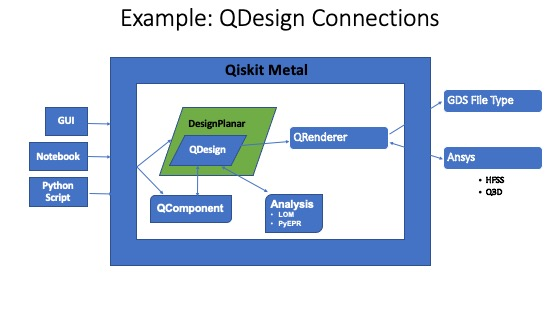

*_This tutorial focuses on Steps 1 and 2 — creating a design and adding components._*

### Using This Tutorial 🚀

You can work with Qiskit Metal in **three** different ways. Each has its own vibe:

#### **1. Jupyter Notebooks 📓 (perfect for learning & experimenting)**  
- Great for interactive exploration  
- Fast feedback loop  
- To use:  
  1. Hit **Run** and enjoy the magic 😄  

#### **2. Python Scripts 🧪 (perfect for debugging & automation)**  
- Ideal when you want breakpoints or repeatable workflows  
- To use:  
  1. Copy snippets from these notebooks into a `.py` file  
  2. Run it in your favorite editor (we love VS Code!)  

#### **3. Metal GUI 🖥️ (visual editing)**  
- The GUI continues to evolve and will eventually support the full workflow  
- To use:  
  1. First create your design in a notebook or script (the GUI won’t create components for you yet)  
  2. Then open the GUI to visualize and manually adjust your design  

Let's dive in! 🌊

### QDesign — What You Need to Know ⭐️

Every quantum circuit you build in Qiskit Metal begins by **instantiating a `QDesign` subclass**.

- The design library `qiskit_metal.designs` contains several design classes tailored for different geometries.  
- Example:  
  - `DesignPlanar` → ideal for 2D chip layouts  
- All design classes inherit from the base `QDesign` class.  
  - `QDesign` defines core behavior and **should not** be instantiated directly.

Simply put:  
**Pick a design class → create an instance → start building.**

### QDesign — A Closer Look 🔍

`QDesign` is the “brain” of your quantum chip model. It keeps track of:

- All components you add (qubits, resonators, coplanar waveguides, etc.)  
- Their parameters and geometry  
- Their relationships (connections, nets, etc.)  
- Metadata and simulation settings  

In the diagram below, you’ll see how `QDesign` organizes and manages all the moving parts in your circuit.  
It’s your control center for everything that happens next.


### Key Concepts in the QDesign Universe ✨

To understand how Qiskit Metal organizes your circuit, here are the main “building blocks” working behind the scenes.

#### **QComponents 🧱**
These represent the physical pieces of your design — **but you never instantiate them directly**.

Examples include:
- Transmon qubits  
- Coplanar waveguides (CPWs)  
- Resonators, pads, and more  

When you add a component to your design:
1. The component’s `make()` method runs  
2. It creates the underlying geometry (rectangles, traces, arcs, etc.)  
3. These shapes are added to the design’s `QGeometryTables`

Think of QComponents as templates that generate real geometry when placed into your design.

---

#### **QGeometryTables 📐**
Created automatically when your `QDesign` initializes.

They store:
- Backend-ready geometric data  
- The shapes produced by each QComponent (polygons, paths, pins, etc.)

As you add components, these tables fill up with the geometry that eventually gets rendered or simulated.

---

#### **QNet.net_info 🔗**
Also created during `QDesign` initialization.

This stores:
- All **connections** between your components  
- Pin-to-pin relationships, signal paths, and logical nets  

Whenever you connect components (e.g., qubit → resonator → feedline), the `net_info` structure is updated automatically.

---

#### **QRenderer 🖨️**
Initialized inside the design as well.

Renderers are what let you **export** your design to tools like:
- Ansys HFSS  
- Ansys Q3D  
- GDSII for fabrication  

The file `qiskit_metal/config.py` lists all renderers detected and ready to use.

Renderers translate your design geometry into whatever format the backend expects.  
They are your bridge to simulation and fabrication.



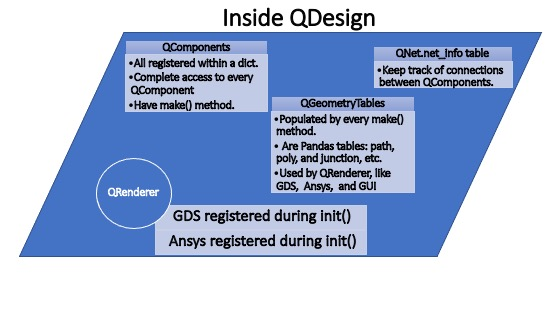

## 🎉 Coding Time!

Today we’ll start building a **2D quantum chip design** and add our very first `QComponent`.  
Nothing fancy yet — just enough to get comfortable with the core workflow.

To make life easier while editing code, let’s enable **automatic reloading of modules**.  
This lets the notebook pick up changes on the fly (super handy when tweaking components!).

Run the cell below:

In [1]:
%load_ext autoreload
%autoreload 2

## Import Qiskit Metal

In [2]:
from qiskit_metal import designs # Library of chip designs

%metal_heading Welcome to Qiskit Metal!

## My First Quantum Design (QDesign) ✨

Time to make something real!
Every Qiskit Metal project begins by choosing a **design layout** — this determines how your components will be arranged on the chip.

We’ll start with the simplest option:

In [3]:
design = designs.DesignPlanar()

In [4]:
# Since we are likely to be making many changes while tuning and modifying our design, we will enable overwriting.
# If you disable the next line, then you will need to delete a component [<component>.delete()] before recreating it.

design.overwrite_enabled = True

In [5]:
%metal_heading Hello Quantum World!

### Inspecting Your Chip 🧱

Every design starts with a default chip called `"main"`.
Let’s peek at its properties — size, material, thickness, and other fabrication-related details.

In [6]:
# We can also check all of the chip properties to see if we want to change the size or any other parameter.
# By default the name of chip is "main".
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

You’ll see a dictionary describing everything about the chip’s geometry.

If you want to change its dimensions, just update the values:

```python
design.chips.main.size.size_x = '11mm'
design.chips.main.size.size_y = '9mm'
```

Chip updated! 🛠️


In [7]:
design.chips.main.size.size_x = '11mm'
design.chips.main.size.size_y = '9mm'

Launch Qiskit Metal GUI to interactively view, edit, and simulate QDesign: Metal GUI

In [8]:
from qiskit_metal import MetalGUI
gui = MetalGUI(design)

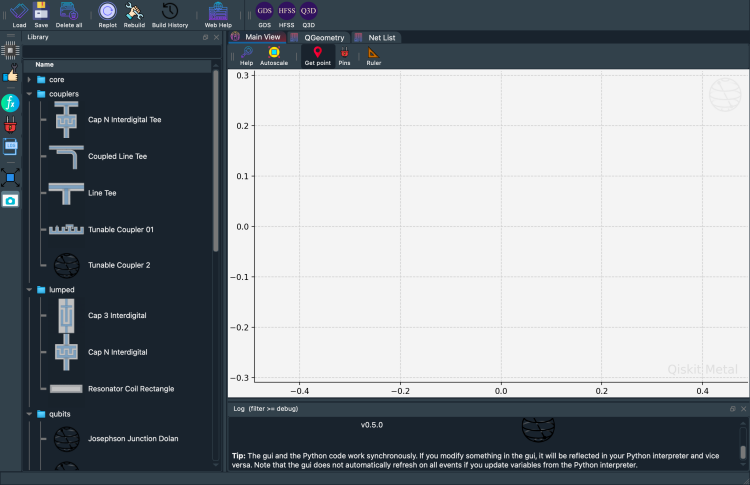

In [9]:
gui.screenshot()

## My First Quantum Component (QComponent)

Ready to draw your first piece of quantum hardware? A QComponent is a single, reusable building block in Quantum Metal. It knows its own geometry, options, and pins, and it registers itself with the design’s tables so renderers can export it.

Here’s the mental model:
- **Design owns everything.** Components live inside a `Design` and share variables and chip bounds.
- **Components declare pins.** Pins are named connection points that routes or couplers can attach to.
- **Options are the API.** Every component ships with defaults you can override (dimensions, gaps, orientation, etc.).
- **Build step writes geometry.** When you call `make()` (explicitly or implicitly), the component populates the QGeometry tables.

We’ll start with a planar design and drop a simple component into it. This notebook uses short, readable code so you can reuse it as a template in your own projects.

What you’ll do next:
1. Create a `DesignPlanar` container.
2. Instantiate a QComponent with custom options.
3. Inspect its pins and geometry tables.
4. Render or export to verify everything looks right.

In [ ]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket


q1 = TransmonPocket(design, 'Q1', options=dict(connection_pads=dict(a=dict()))) # Create a new Transmon Pocket object with name 'Q1'
gui.rebuild()  # rebuild the design and plot

gui.edit_component('Q1') # set Q1 as the editable component
gui.autoscale() # resize GUI view to see QComponent

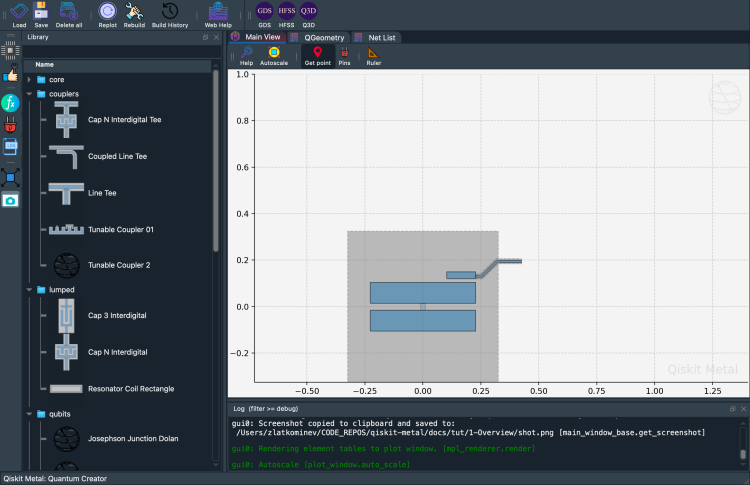

In [11]:
gui.screenshot()

Let's see what the Q1 object looks like

In [21]:
print(q1) #print Q1 information

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0.0um',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',                        
            'pocket_rise'    

#### What are the default options?
The QComponent comes with some default options like the length of the pads for our transmon pocket.
* Options are parsed internally by Qiskit Metal via the component's `make` function. 
* You can change option parameters from the gui or the script api. 

In [22]:
%metal_print How do I edit options?  API or GUI

You can now use the Metal GUI to edit, plot, and modify quantum components.
Equivalently, you can also do everything from the Jupyter Notebooks/Python scripts (which call the Python API directly).
The GUI is just calling the Python API for you.

We’ll nudge the qubit’s position and reshape its pads by overriding a few options:

- `pos_x`, `pos_y`: move the component on the chip (strings with units are fine).
- `pad_height`, `pad_width`: size of each pad.
- `pad_gap`: clearance between the pad and pocket.

**You must use a string when setting options!**

In [23]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'

After changing options, rebuild to regenerate the geometry and update the tables:

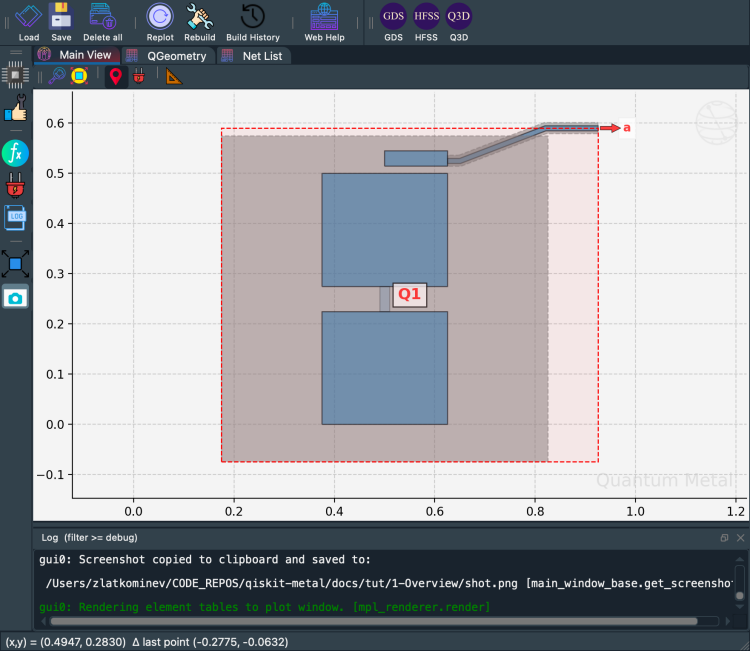

In [ ]:
gui.rebuild() # Update the component geometry, since we changed the options

# Get a list of all the qcomponents in QDesign and then zoom on them.
all_component_names = design.components.keys()

gui.zoom_on_components(all_component_names)

# An alternate way to view within GUI. If want to try it, remove the "#" from the beginning of line.
gui.highlight_components(['Q1']) # set Q1 as the highlighted component
gui.screenshot()


This sequence moves and resizes the qubit, rebuilds its geometry, centers the view on all components, and lets you inspect it interactively in the GUI.

**Closing the Qiskit Metal GUI**

In [15]:
# gui.main_window.close()

## 🎯 Wrapping up

You just walked the essential loop:
- Created a planar design and saw how it owns chips, variables, and renderers.
- Dropped your first QComponent, inspected its pins/options, and tweaked its geometry.
- Used the GUI to rebuild, autoscale, and visually verify changes.

Where to go next?
- Add another qubit or a readout resonator and connect pins with a route.
- Experiment with renderer exports (GDS, Ansys, MPL) to see how the geometry flows downstream.
- Browse other tutorials for analysis workflows (EPR/BBQ) and multi-component layouts.

You’re set to explore—keep iterating, and remember: rebuild after edits, and autoscale to check your work. 🚀